Importing necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import misc
import cv2

Shape: (768, 1024, 3)


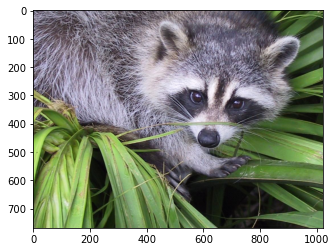

In [3]:
face = misc.face()
print(f"Shape: {face.shape}")
plt.imshow(face)

Convert to black&white

(768, 1024)


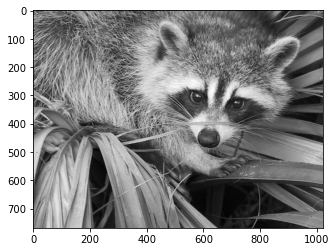

In [4]:
face_bw = misc.face(gray=True)
plt.imshow(face_bw, cmap='gray')
print(face_bw.shape)

Rescale

(185, 249)


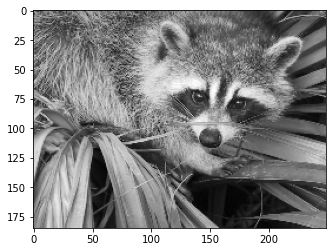

In [5]:
face_bw_resized = cv2.resize(face_bw,(249,185))
print(face_bw_resized.shape)
plt.imshow(face_bw_resized, cmap='gray')

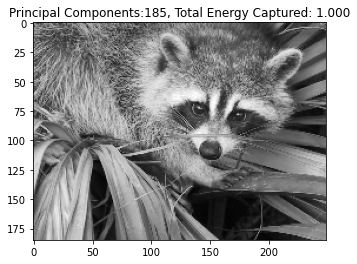

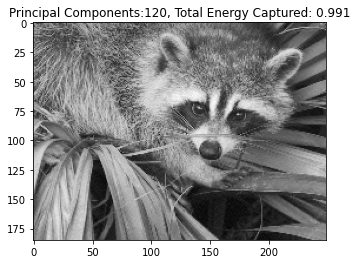

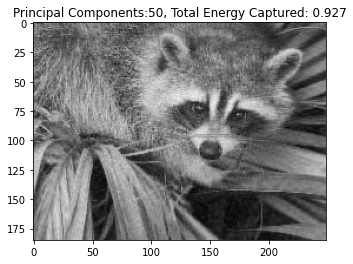

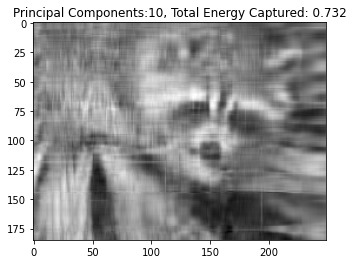

In [11]:
values = [185, 120, 50, 10]
for value in values:
    U, S, Vt = linalg.svd(face_bw_resized)

    U = U[:, 0:value]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = face_bw_resized.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_img = np.dot(U, np.dot(sigma, Vt))
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f'Principal Components:{value}, Total Energy Captured: {np.sum(pca_variance_ratio[0:value]):.3f}')
    plt.show()